# Initial training on reduced sample of images
The network is initially trained using just the first 200 games, split into 80/20 ratio as train/validation sets.

## initial setup:

In [1]:
# auto reloading and inline display of matplotlib output:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
# import fastai external dependencies
from fastai.imports import *

C:\Users\richard\AppData\Local\conda\conda\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# import the various fastai functions (mainly wrappers around scikit-learn and pytorch functions)
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# check we're in right directory (should be /c/code)
!pwd

/c/code


In [4]:
arch = resnet18
sz = 256

In [5]:
PATH = "data/gcgs/"
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [7]:
# in case any preprocessing is done after instantiating the Learner, 
# let's not just swap in the new data-set, let's just make a new object
# with the new data and load the old weights into it:

learn = ConvLearner.pretrained(arch, data, precompute=False)

In [11]:
lr = 0.01 # the learning rate we found above

# here we'll set the early, middle and late layers to different fractions of this learning rate:
lrs = np.array([lr/4,lr/2,lr])

In [12]:
# retrain with the new data (just 1 epoch):
learn.fit(lrs, 1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.311381   0.304739   0.875073  



[array([0.30474]), 0.8750729509536148]

[[11025 10393]
 [  310 63946]]


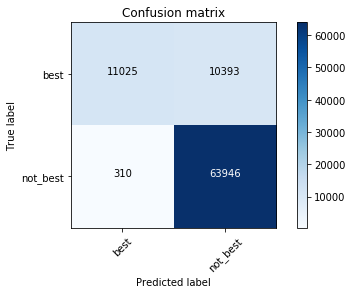

In [13]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
cm = confusion_matrix(data.val_y, preds)
plot_confusion_matrix(cm, data.classes)

In [14]:
learn.save('epoch11')

In [15]:
# let's do another couple of epochs:
learn.fit(lrs, 2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.301277   0.304847   0.874548  
    1      0.300408   0.305338   0.874454                                                                              



[array([0.30534]), 0.8744543268669608]

In [16]:
learn.save('epoch13')

[[10830 10588]
 [  168 64088]]


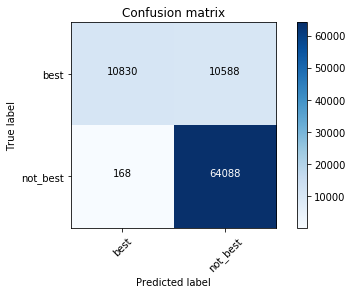

In [17]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
cm = confusion_matrix(data.val_y, preds)
plot_confusion_matrix(cm, data.classes)

In [18]:
# and with restarts:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.299056   0.304235   0.875155  
    1      0.299045   0.304623   0.87505                                                                               
    2      0.31603    0.30378    0.875657                                                                              
    3      0.310491   0.305511   0.874373                                                                              
    4      0.323625   0.303799   0.87596                                                                               
    5      0.309047   0.304104   0.875213                                                                              
    6      0.30833    0.303564   0.875867                                                                              



[array([0.30356]), 0.8758666573289446]

In [19]:
learn.save('epoch20')

[[11050 10368]
 [  267 63989]]


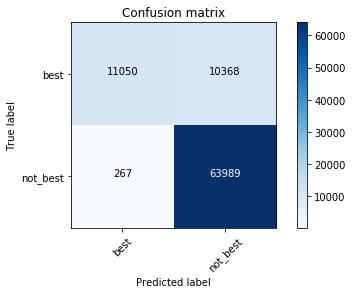

In [20]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
cm = confusion_matrix(data.val_y, preds)
plot_confusion_matrix(cm, data.classes)

In [21]:
lrs = np.array([lr,lr,lr])
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.305954   0.30343    0.876042  
    1      0.299114   0.303834   0.8754                                                                                
    2      0.306889   0.303238   0.875902                                                                              
    3      0.30448    0.30377    0.875913                                                                              
    4      0.30751    0.304224   0.874769                                            
    5      0.307451   0.30304    0.87589                                             
    6      0.307217   0.303457   0.87554                                             



[array([0.30346]), 0.87553983705675]

In [22]:
learn.save('epoch27')

[[11006 10412]
 [  251 64005]]


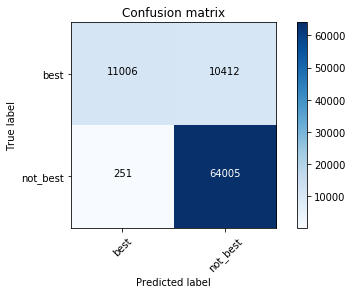

In [23]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
cm = confusion_matrix(data.val_y, preds)
plot_confusion_matrix(cm, data.classes)